<a href="https://colab.research.google.com/github/sharvarijiwtode/PRODIGY_GA/blob/main/PRODIGY_GA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#STEP-01
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118
!pip install transformers datasets

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.0.1%2Bcu118-cp311-cp311-linux_x86_64.whl (2267.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 96.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.7.0+cpu
    Uninstalling torch-2.7.0+cpu:
      Successfully uninstalled torch-2.7.0+cpu
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.22.0+cpu
    Uninstalling torchvision-0.22.0+cpu:
      Successfully uninstalled torchvision-0.22.0+cpu
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.7.0+cpu
    Uninstalling torchaudio-2.7.0+cpu:
      Successfully uninstalled torchaudio-2.7.0+cpu


In [4]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install transformers datasets huggingface_hub

Found existing installation: torch 2.7.0+cpu
Uninstalling torch-2.7.0+cpu:
  Successfully uninstalled torch-2.7.0+cpu
Found existing installation: torchvision 0.22.0+cpu
Uninstalling torchvision-0.22.0+cpu:
  Successfully uninstalled torchvision-0.22.0+cpu
Found existing installation: torchaudio 2.7.0+cpu
Uninstalling torchaudio-2.7.0+cpu:
  Successfully uninstalled torchaudio-2.7.0+cpu
Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.7.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.22.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.7.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.6 kB)
Using cached https://download.pytorch.org/whl/cpu/torch-2.7.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl (176.0 MB)
Using cached https://download.pytorch.org/whl/c

In [15]:
import torch
print( torch.__version__)
print(torch.cuda.is_available())

2.7.0+cpu
False


In [16]:
pip install --upgrade transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0+cpu which is incompatible.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [17]:
#STEP-02
import pandas as pd
df = pd.read_csv('/content/Articles.csv', encoding = 'ISO-8859-1')
print(df.columns)
df.head()

Index(['Article', 'Date', 'Heading', 'NewsType'], dtype='object')


,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


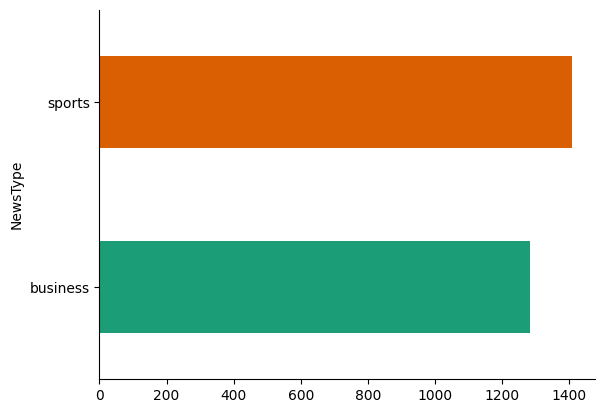

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('NewsType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
#STEP-03
df['Article'] = df['Article'].astype(str)
df['Article'].to_csv('train_data.txt', index=False, header=False)

In [20]:
#STEP-04
from datasets import Dataset
with open("train_data.txt", "r", encoding="ISO-8859-1") as f:
  lines = f.readlines()
dataset = Dataset.from_dict({"text":lines})
dataset[0]

{'text': '"KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due to massive reduction in petroleum product prices by the federal government, Geo News reported.Sources said reduction in fares will be applicable on public transport, rickshaw, taxi and other means of traveling.Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the government decision.KTI President Irshad Bukhari said the commuters are charged the lowest fares in Karachi as compare to other parts of the country, adding that 80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi transporters will cut fares when decrease in CNG prices will be made.                        \n'}

In [21]:
#STEP-05
from transformers import GPT2Tokenizer
from datasets import Dataset
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
def tokenize_function(batch):
  tokenized = tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512)
  tokenized["labels"] = tokenized["input_ids"].copy()
  return tokenized

In [22]:
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
print(tokenized_dataset.column_names)

Map:   0%|          | 0/6844 [00:00<?, ? examples/s]

['text', 'input_ids', 'attention_mask', 'labels']


In [13]:
!pip install numpy==1.26.4

In [ ]:
#STEP-06

from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_dataset

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Use from_dict to avoid filesystem issues
from datasets import Dataset

with open("train_data.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

dataset = Dataset.from_dict({"text": lines})

# Tokenization function
def tokenize_function(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=512)

# Tokenize dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Data collator for causal language modeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    logging_dir="./logs",
    save_steps=10,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
)

# Train
trainer.train()


Map:   0%|          | 0/6844 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss


Step,Training Loss
